# Mini Project - Clustering

## Business objective

### To predict customer clustering to identify the different types of customers

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_samples, silhouette_score



import warnings
warnings.filterwarnings('ignore')

# Data loading

In [2]:
data=pd.read_csv("Proj3_MallCustomers_Data_Project.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Data understanding

In [3]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
data.size            #total number of observations

1000

In [5]:
data.shape        #rows and columns

(200, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.describe().T        #summary of numerical data

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [8]:
data.describe(include='object').T          #summary of object data

,count,unique,top,freq
Gender,200,2,Female,112


In [9]:
data.isna().sum()          #checking for null values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### There are no null values in the data

In [10]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

### The column, gender is a  categorical column, so we have to encode them into numerical column

# Label encoding

In [11]:
label=LabelEncoder()

In [12]:
data['Gender_encode']=label.fit_transform(data.Gender)

In [13]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_encode
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,1


### We can drop the customerID column as it does not play any role in the clustering 

In [14]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_encode
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,1


# EDA

## Univariate

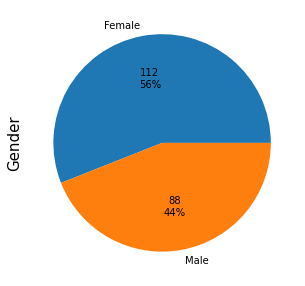

In [15]:
labels=data['Gender'].unique()
def label_function(val):
    return f'{val / 100 * len(data):.0f}\n{val:.0f}%'
fig, ax = plt.subplots(ncols=1, figsize=(10, 5))
data.groupby(data['Gender']).size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, ax=ax)
ax.set_ylabel('Gender', size=15)
# show plot
plt.show()

### The customer are almost equally distributed between the genders. Females customers(56%) are little more then male customers(44%)

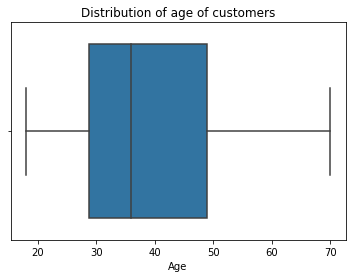

In [16]:
sns.boxplot(data['Age'])
plt.title("Distribution of age of customers")
plt.show()

### Most of the customers are in the range of 28-50 years old

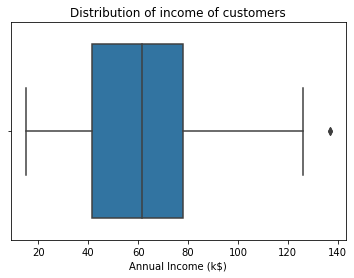

In [17]:
sns.boxplot(data['Annual Income (k$)'])
plt.title("Distribution of income of customers")
plt.show()

### The annual income of most customers is from 40-80K

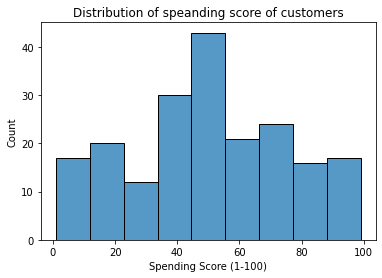

In [18]:
sns.histplot(data['Spending Score (1-100)'])
plt.title("Distribution of speanding score of customers")
plt.show()

### Most the customers have speanding score from 40-80

# Bivariate

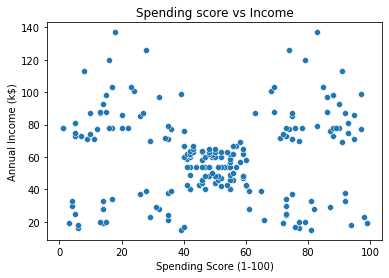

In [19]:
sns.scatterplot(data['Spending Score (1-100)'],data['Annual Income (k$)'])
plt.title("Spending score vs Income")
plt.show()

### There is no correlation between speanding score and annual income

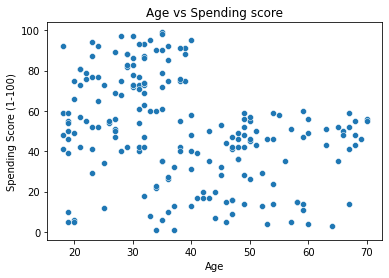

In [20]:
sns.scatterplot(data['Age'],data['Spending Score (1-100)'])
plt.title("Age vs Spending score")
plt.show()

### We can observe that the spending score decreases as the age crosses 40

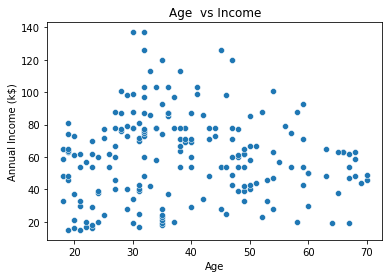

In [21]:
sns.scatterplot(data['Age'],data['Annual Income (k$)'])
plt.title("Age  vs Income")
plt.show()

### There is no clear correlation between age and income

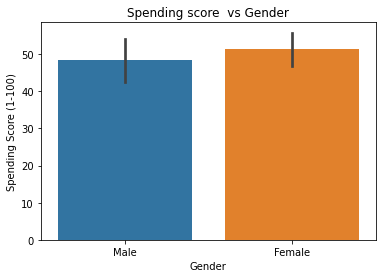

In [22]:
sns.barplot(data.Gender,data['Spending Score (1-100)'])
plt.title("Spending score  vs Gender")
plt.show()

### Females have slighly more speanding score than the males

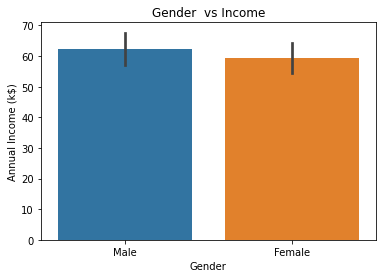

In [23]:
sns.barplot(data.Gender,data['Annual Income (k$)'])
plt.title("Gender  vs Income")
plt.show()

### Male has a slightly more income than females

# Data scaling

In [24]:
scale=MinMaxScaler()

In [25]:
scaled_data=pd.DataFrame(scale.fit_transform(data.drop(columns=['Gender','CustomerID'])),columns=data.drop(columns=['Gender','CustomerID']).columns)

In [26]:
scaled_data

,Age,Annual Income (k$),Spending Score (1-100),Gender_encode
0,0.019231,0.000000,0.387755,1.0
1,0.057692,0.000000,0.816327,1.0
2,0.038462,0.008197,0.051020,0.0
3,0.096154,0.008197,0.775510,0.0
4,0.250000,0.016393,0.397959,0.0
...,...,...,...,...
195,0.326923,0.860656,0.795918,0.0
196,0.519231,0.909836,0.275510,0.0
197,0.269231,0.909836,0.744898,1.0
198,0.269231,1.000000,0.173469,1.0


# ML model

### As we do not have a target variable here this falls under unsupervised ML

### Here we use clustering to seperate customers based on similarities

# K Means Model

## Finding good value of K

### Elbow method

In [27]:
x=scaled_data

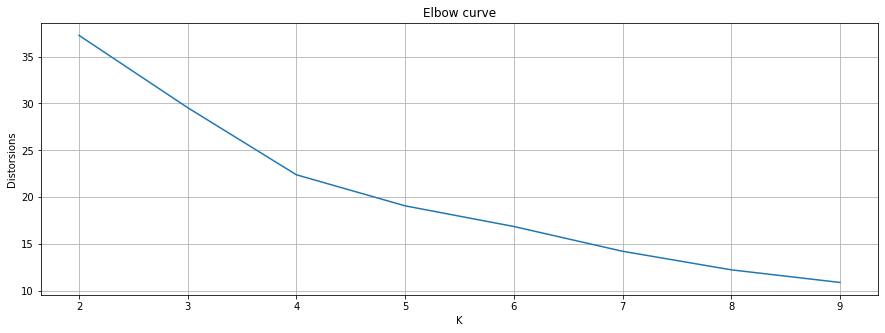

In [28]:
distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

### We dont get a proper elbow from the graph so we go with the Silhouette score method to find the K value

### Finding the optimum value of K and cluster efficiency using Silhouette Score

For n_clusters = 2 The average silhouette_score is : 0.5194624832665107
For n_clusters = 3 The average silhouette_score is : 0.4583525581125425
For n_clusters = 4 The average silhouette_score is : 0.3641657522339062
For n_clusters = 5 The average silhouette_score is : 0.37063226192201243
For n_clusters = 6 The average silhouette_score is : 0.37896616979430175
For n_clusters = 7 The average silhouette_score is : 0.3842948465679879
For n_clusters = 8 The average silhouette_score is : 0.3948127593861513
For n_clusters = 9 The average silhouette_score is : 0.41803161276624434
For n_clusters = 10 The average silhouette_score is : 0.4012776308835101


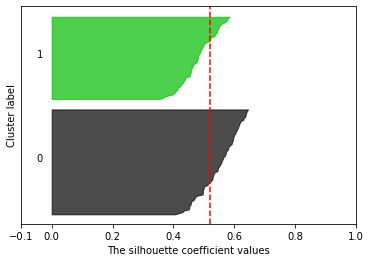

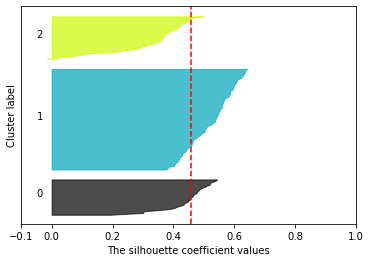

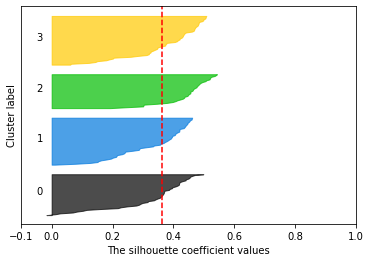

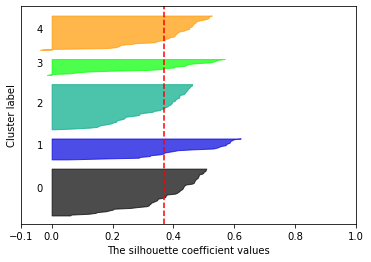

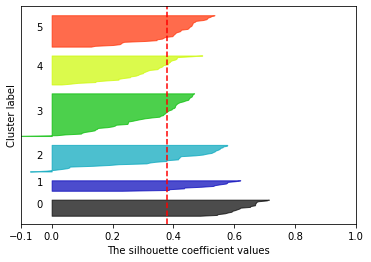

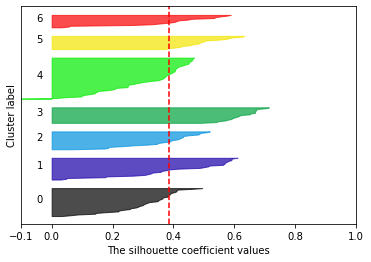

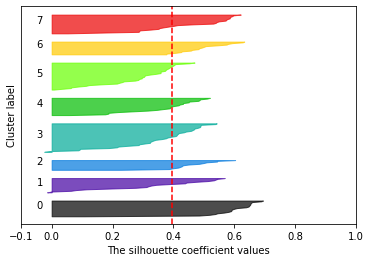

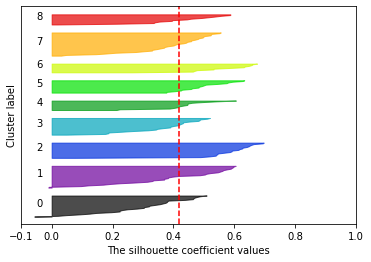

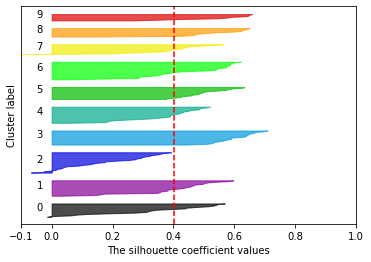

In [29]:
range_n_clusters = [2, 3, 4, 5, 6, 7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

### For the KMeans model with n_clusters=2 we get the highest value of silhouette_score 

### Silhouette_score is 0.5194

In [30]:
km_model=KMeans(n_clusters=2)

In [31]:
km_predict=km_model.fit_predict(x)         #cluster prediction

In [32]:
km_predict        #predicted clusters

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1])

In [33]:
km_sil=silhouette_score(x,km_predict)

In [34]:
print("The silhouette score for KMeans Model is : ",km_sil)

The silhouette score for KMeans Model is :  0.5194624832665107


# Hierarchical Clustering Model

## Plotting Dendogram for number of clusters

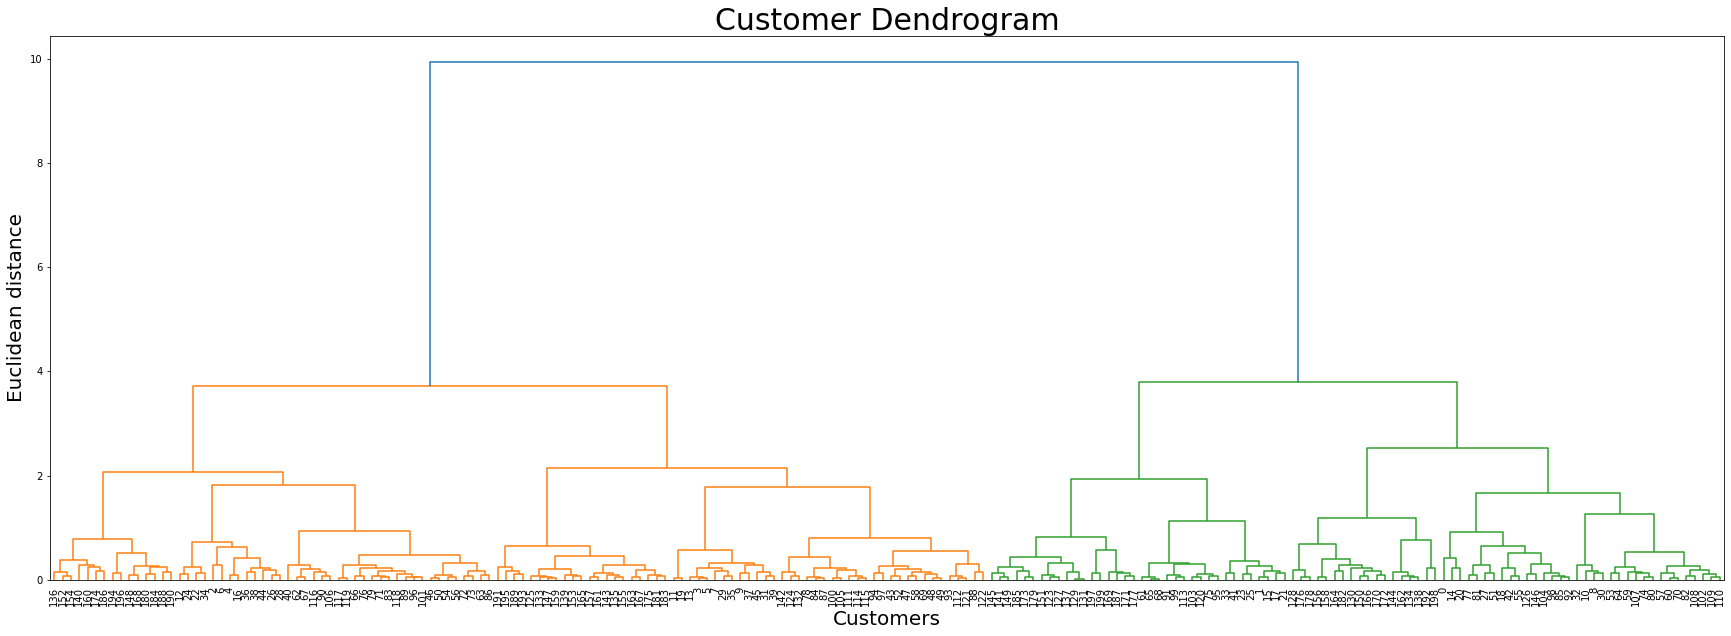

In [35]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(x, method = 'ward'),labels=scaled_data.index)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

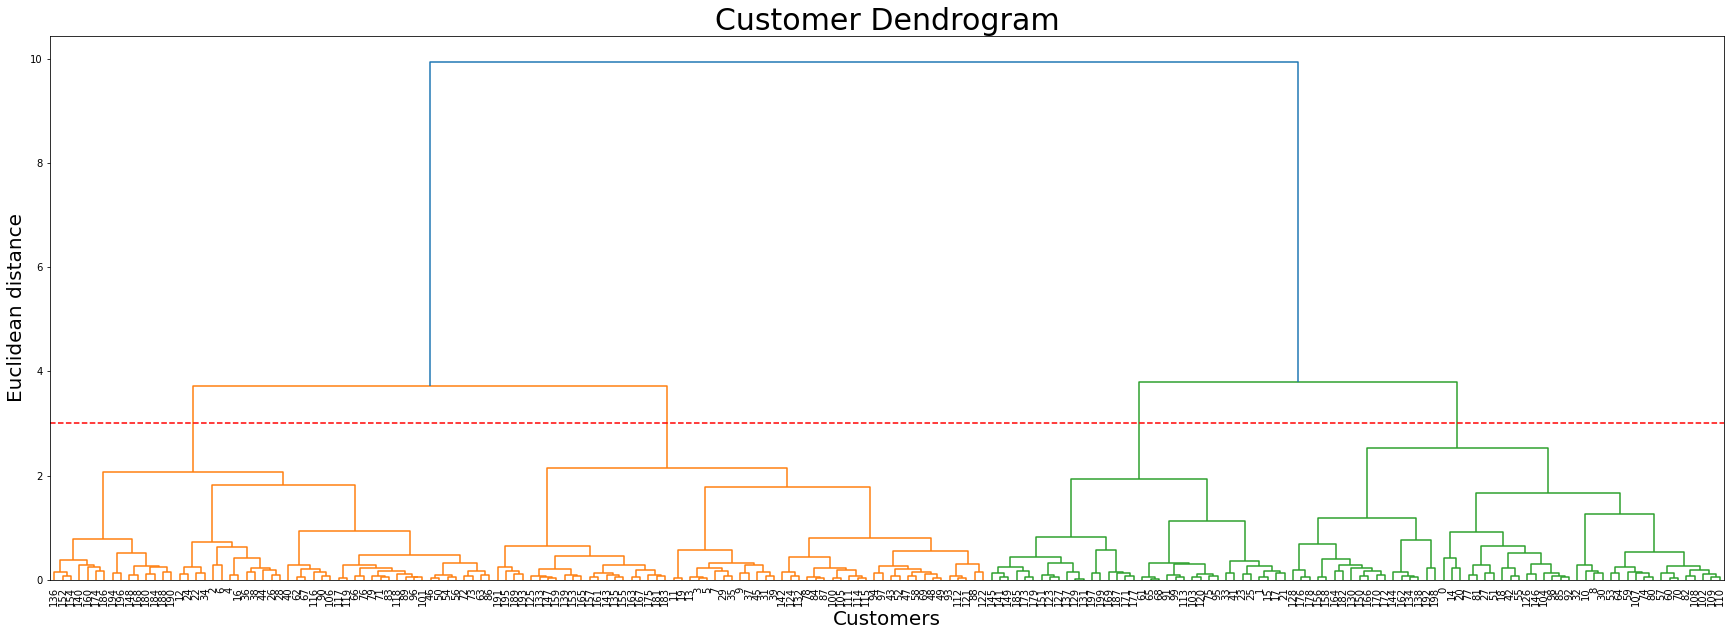

In [36]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(x, method = 'ward'),labels=scaled_data.index)
plt.axhline(y=3, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

### Here in our case we get n_clusters = 4 for euclidean distance of 3

In [37]:
hc_model=AgglomerativeClustering(n_clusters=4)    #modelling

In [38]:
hc_predict=hc_model.fit_predict(x)   #prediction

In [39]:
hc_predict    #predicted values

array([0, 2, 3, 1, 3, 1, 3, 1, 0, 1, 0, 1, 3, 1, 0, 2, 3, 2, 0, 1, 0, 2,
       3, 2, 3, 2, 3, 0, 3, 1, 0, 1, 0, 2, 3, 1, 3, 1, 3, 1, 3, 2, 0, 1,
       3, 1, 3, 1, 1, 1, 3, 0, 1, 0, 3, 0, 3, 0, 1, 0, 0, 2, 3, 3, 0, 2,
       3, 3, 2, 1, 0, 3, 3, 3, 0, 2, 3, 0, 1, 3, 0, 0, 0, 3, 1, 0, 3, 1,
       1, 3, 3, 2, 0, 1, 1, 2, 3, 1, 0, 2, 1, 3, 0, 2, 0, 1, 3, 0, 0, 0,
       0, 1, 1, 2, 1, 1, 3, 3, 3, 3, 2, 1, 1, 2, 1, 1, 0, 2, 0, 2, 0, 2,
       1, 1, 0, 1, 3, 2, 0, 1, 3, 2, 1, 1, 0, 2, 0, 1, 3, 2, 0, 2, 3, 1,
       3, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 3, 2, 0, 2, 0, 2, 3, 1,
       0, 2, 0, 2, 3, 1, 0, 1, 3, 2, 3, 2, 3, 1, 3, 1, 0, 1, 3, 1, 3, 2,
       0, 2], dtype=int64)

In [40]:
hc_sil=silhouette_score(x,hc_predict)

In [41]:
print("The silhouette score for Hierarchical Clustering Model is : ",hc_sil)

The silhouette score for Hierarchical Clustering Model is :  0.3444266582171814


# DBSCAN model

## Finding optimum values of number of clusters

In [44]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(scaled_data)
distances, indices = nbrs.kneighbors(scaled_data)

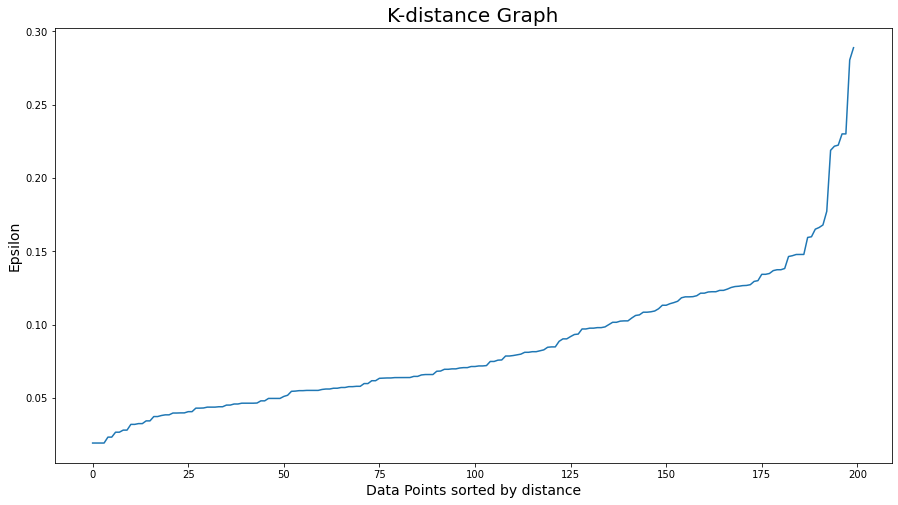

In [43]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

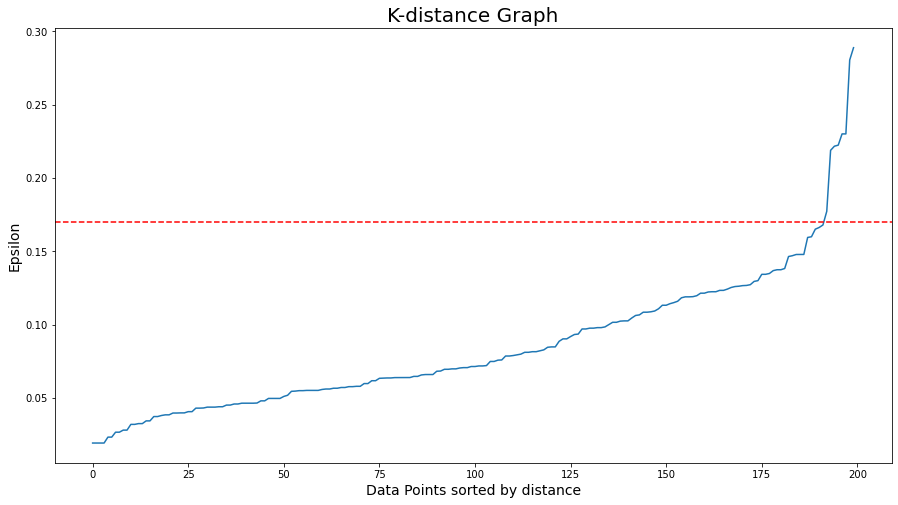

In [45]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=0.17, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [46]:
eps=0.17
for min_samples in [2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(scaled_data)

    x= cluster_labels +2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)

eps= 0.17 | min_samples=  2 | obtained clustering:  [(1, 8), (2, 44), (3, 73), (4, 4), (5, 2), (6, 10), (7, 16), (8, 20), (9, 3), (10, 4), (11, 6), (12, 6), (13, 2), (14, 2)]
eps= 0.17 | min_samples=  3 | obtained clustering:  [(1, 14), (2, 44), (3, 73), (4, 4), (5, 10), (6, 16), (7, 20), (8, 4), (9, 6), (10, 6), (11, 3)]
eps= 0.17 | min_samples=  4 | obtained clustering:  [(1, 24), (2, 8), (3, 72), (4, 26), (5, 10), (6, 16), (7, 20), (8, 4), (9, 8), (10, 6), (11, 6)]
eps= 0.17 | min_samples=  5 | obtained clustering:  [(1, 43), (2, 63), (3, 7), (4, 8), (5, 24), (6, 10), (7, 16), (8, 20), (9, 9)]
eps= 0.17 | min_samples=  6 | obtained clustering:  [(1, 55), (2, 63), (3, 6), (4, 23), (5, 10), (6, 11), (7, 20), (8, 4), (9, 8)]
eps= 0.17 | min_samples=  7 | obtained clustering:  [(1, 76), (2, 62), (3, 23), (4, 10), (5, 11), (6, 18)]
eps= 0.17 | min_samples=  8 | obtained clustering:  [(1, 77), (2, 11), (3, 50), (4, 23), (5, 10), (6, 11), (7, 18)]
eps= 0.17 | min_samples=  9 | obtained clu

### Here we have taken the value of epsilon as 0.17 and we select min samples as 12 as it has less number of clusters and has better spread of cluster

In [47]:
db_model=DBSCAN(eps=0.17,min_samples=12)     #modelling

In [48]:
db_predict=db_model.fit_predict(scaled_data)      #prediction

In [49]:
db_predict          #prediciton values

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  0,  1,  0,  1,  1,  1,  0,
       -1,  1, -1,  0, -1,  0, -1,  1, -1, -1, -1, -1,  0, -1, -1,  0, -1,
       -1,  1, -1,  0, -1, -1, -1, -1,  0, -1,  1,  0, -1, -1, -1,  0,  1,
       -1,  0,  1,  1,  0, -1, -1, -1,  0,  1, -1,  0,  1, -1, -1,  1,  0,
       -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  0,  0,
        0, -1, -1,  0, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1,  2, -1,  2,
       -1, -1, -1,  2, -1, -1,  1,  2, -1, -1, -1,  2, -1, -1, -1, -1, -1,
        2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1,  2, -1, -1,
       -1, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1,  2, -1,  2, -1, -1, -1,
       -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [50]:
db_sil=silhouette_score(scaled_data,db_predict)

In [51]:
print("The silhouette score for DBSCAN Model is : ",db_sil)

The silhouette score for DBSCAN Model is :  0.09723956039948468


# Model selection

In [52]:
silhouette_score={"KMeans":km_sil,'Hierarchical':hc_sil,'DBSCAN':db_sil}

In [53]:
name=list(silhouette_score.keys())
values=list(silhouette_score.values())

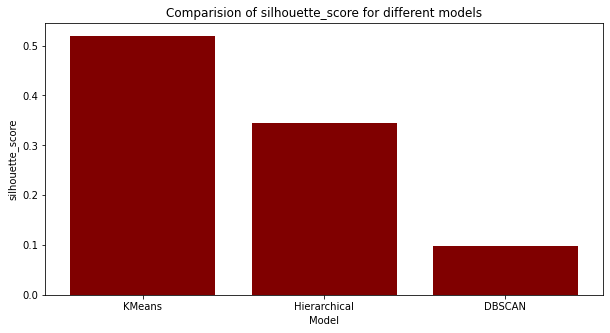

In [54]:
plt.figure(figsize=(10,5))
plt.bar(name,values,color='maroon')
plt.title("Comparision of silhouette_score for different models")
plt.xlabel("Model")
plt.ylabel("silhouette_score")
plt.show()

### We can observe that the KMeans model has the best silhouette_score. So we take KMeans for the final modelling

# BEST MODEL : KMeans

In [55]:
km_model=KMeans(n_clusters=2)

In [56]:
km_predict=km_model.fit_predict(scaled_data)         #cluster prediction

In [57]:
km_predict        #predicted clusters

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1])

In [58]:
print("The silhouette score for KMeans Model is : ",km_sil)

The silhouette score for KMeans Model is :  0.5194624832665107


In [59]:
data['cluster']=km_predict

In [60]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_encode,cluster
0,1,Male,19,15,39,1,1
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,0
196,197,Female,45,126,28,0,0
197,198,Male,32,126,74,1,1
198,199,Male,32,137,18,1,1


## Cluster 0

In [61]:
cluster0=data[data['cluster']==0]

In [62]:
cluster0

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_encode,cluster
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,0
5,6,Female,22,17,76,0,0
6,7,Female,35,18,6,0,0
...,...,...,...,...,...,...,...
191,192,Female,32,103,69,0,0
193,194,Female,38,113,91,0,0
194,195,Female,47,120,16,0,0
195,196,Female,35,120,79,0,0


In [63]:
cluster0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 2 to 196
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              112 non-null    int64 
 1   Gender                  112 non-null    object
 2   Age                     112 non-null    int64 
 3   Annual Income (k$)      112 non-null    int64 
 4   Spending Score (1-100)  112 non-null    int64 
 5   Gender_encode           112 non-null    int32 
 6   cluster                 112 non-null    int32 
dtypes: int32(2), int64(4), object(1)
memory usage: 6.1+ KB


In [64]:
cluster0.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,112.0,97.562500,58.276412,3.0,46.75,94.5,148.25,197.0
Age,112.0,38.098214,12.644095,18.0,29.00,35.0,47.50,68.0
Annual Income (k$),112.0,59.250000,26.011952,16.0,39.75,60.0,77.25,126.0
Spending Score (1-100),112.0,51.526786,24.114950,5.0,35.00,50.0,73.00,99.0
Gender_encode,112.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
cluster,112.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


## Customers in cluster 0

In [65]:
cluster0[['CustomerID']]

,CustomerID
2,3
3,4
4,5
5,6
6,7
...,...
191,192
193,194
194,195
195,196


## Cluster 1

In [66]:
cluster1=data[data['cluster']==1]

In [67]:
cluster1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_encode,cluster
0,1,Male,19,15,39,1,1
1,2,Male,21,15,81,1,1
8,9,Male,64,19,3,1,1
10,11,Male,67,19,14,1,1
14,15,Male,37,20,13,1,1
...,...,...,...,...,...,...,...
187,188,Male,28,101,68,1,1
192,193,Male,33,113,8,1,1
197,198,Male,32,126,74,1,1
198,199,Male,32,137,18,1,1


In [68]:
cluster1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              88 non-null     int64 
 1   Gender                  88 non-null     object
 2   Age                     88 non-null     int64 
 3   Annual Income (k$)      88 non-null     int64 
 4   Spending Score (1-100)  88 non-null     int64 
 5   Gender_encode           88 non-null     int32 
 6   cluster                 88 non-null     int32 
dtypes: int32(2), int64(4), object(1)
memory usage: 4.8+ KB


In [69]:
cluster1.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,88.0,104.238636,57.483830,1.0,59.50,106.5,151.25,200.0
Age,88.0,39.806818,15.514812,18.0,27.75,37.0,50.50,70.0
Annual Income (k$),88.0,62.227273,26.638373,15.0,45.50,62.5,78.00,137.0
Spending Score (1-100),88.0,48.511364,27.896770,1.0,24.50,50.0,70.00,97.0
Gender_encode,88.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
cluster,88.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0


## Customers in cluster 1

In [70]:
cluster1[['CustomerID']]

,CustomerID
0,1
1,2
8,9
10,11
14,15
...,...
187,188
192,193
197,198
198,199


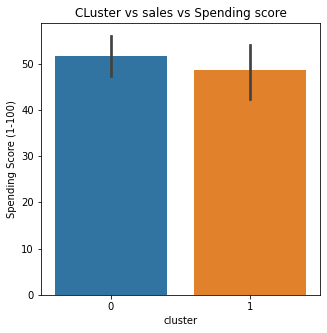

In [71]:
plt.figure(figsize=(5,5))
sns.barplot(data.cluster,data['Spending Score (1-100)'])
plt.title("CLuster vs sales vs Spending score")
plt.show()

### Cluster 0 has higher speanding score than cluster 1

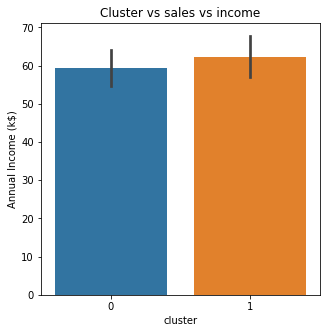

In [72]:
plt.figure(figsize=(5,5))
sns.barplot(data.cluster,data['Annual Income (k$)'])
plt.title("Cluster vs sales vs income")
plt.show()

### Customers in cluster 1 earn more than customers in cluster 0

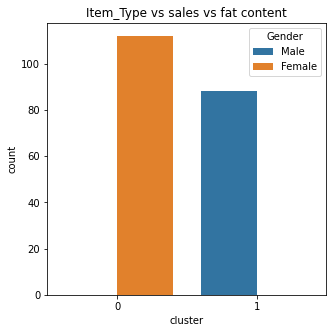

In [77]:
plt.figure(figsize=(5,5))
sns.countplot(data['cluster'],hue=data.Gender)
plt.title("Item_Type vs sales vs fat content")
plt.show()

### Cluster 0 has only Female customers whereas cluster 1 has only male customers

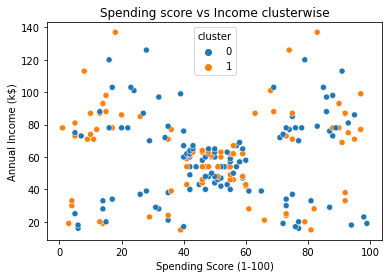

In [76]:
sns.scatterplot(data['Spending Score (1-100)'],data['Annual Income (k$)'],hue=data.cluster)
plt.title("Spending score vs Income clusterwise")
plt.show()

## So, the KMeans give the best prediction of customer segmentation

## The silhouette score for KMeans Model is : 0.519

## In this model the customers are segmented into 2 cluster: cluster0 and cluster 1

## Cluster 0 has only Female customers whereas cluster 1 has only male customers

## Customers in cluster 1 earn more than customers in cluster 0

## Cluster 0 has higher spending score than cluster 1

# Insights

The customer are almost equally distributed between the genders. Females customers(56%) are little more then male customers(44%)  
Most of the customers are in the range of 28-50 years old  
The annual income of most customers is from 40-80K  
Most the customers have speanding score from 40-80  
There is no correlation between speanding score and annual income  
The spending score decreases as the age crosses 40    
There is no clear correlation between age and income  
Females have slighly more speanding score than the males  
Males have a slightly more income than females